In [1]:
import numpy as np
import sympy as smp
from sympy import symbols, Eq, solve
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from tabulate import tabulate
import matplotlib

In [2]:
def load(name):
    channel, n = np.genfromtxt(name, delimiter = ':' ,unpack = True, skip_header=7)
    return channel, n

def linear(x,a,b):
    return a*x + b

w = 3.5260245493470563

# DŮ Kal. krivka

In [3]:
V = np.array([100,200,400])
JC = np.array([25,52,101])
sV = np.sqrt(5**2 + 17)/100*V

def func(x,a,b):
    return a*x + b

params,err = curve_fit(func, JC, V, sigma=sV, absolute_sigma=True)

a,b = params
sa,sb = np.sqrt(np.diag(err))
print(a,'+-',sa)
print(b,'+-',sb)

3.8795770669141363 +- 0.30808734173638275
2.3514218785520993 +- 11.840338025496207


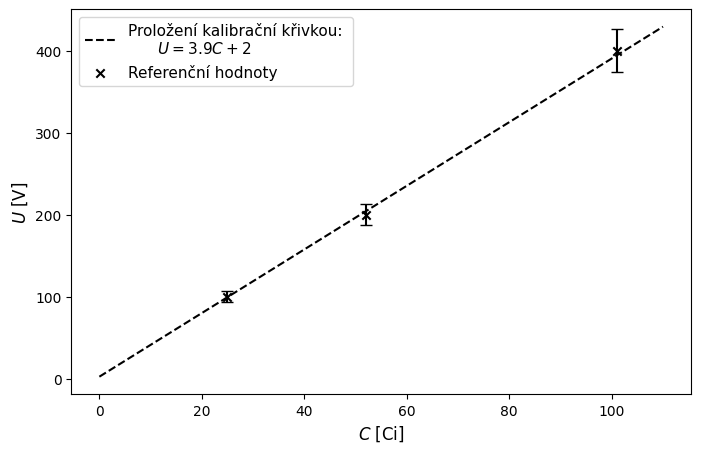

In [4]:
x_range = np.linspace(0,110,100)

plt.figure(figsize = (8,5))


plt.scatter(JC,V,color = 'k',marker='x',label = 'Referenční hodnoty')
plt.errorbar(JC,V,yerr=sV, fmt='none',elinewidth=1.5,ecolor='k',capsize=4)
plt.plot(x_range,func(x_range,a,b), color = 'k', linestyle = 'dashed', label = "Proložení kalibrační křivkou: \n" + r"$\qquad U = 3.9C + 2$")

#plt.legend(loc='upper left', fontsize=11)

handles, labels = plt.gca().get_legend_handles_labels()
order = [1,0]
plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order], loc='upper left', fontsize=11)


plt.ylabel("$U$ " + "[V]", fontsize=12)
plt.xlabel("$C$ [Ci]", fontsize=12)

plt.savefig('kalibrace.pdf', bbox_inches = 'tight')
plt.show()

# Uloha 1

In [7]:
### 25 oken po 20s, o.1 - 2.5V ((0.1-0.2)-(2.5-2.6) )
U = np.arange(0.1,2.6,0.1)
A = np.array([2254,3703,5581,4354,3451,3206,2301,2156,1652,1211,812,875,632,160,264,222,150,133,178,258,378,226,168,94,107])
A.shape
#plt.scatter(U,A)

(25,)

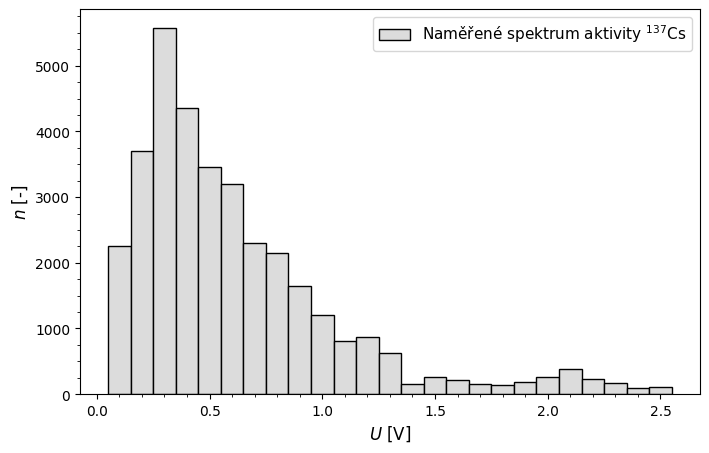

In [6]:
x_range = np.linspace(0,110,100)

plt.figure(figsize = (8,5))


plt.bar(U,A,0.1,edgecolor = 'k', facecolor = 'gainsboro', label = "Naměřené spektrum aktivity $^{137}$Cs")
#plt.plot(x_range,func(x_range,a,b), color = 'k', linestyle = 'dashed', label = "Proložení kalibrační křivkou: \n" + r"$\qquad U = 3.9C + 2$")

plt.legend(loc='upper right', fontsize=11)

#handles, labels = plt.gca().get_legend_handles_labels()
#order = [1,0]
#plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order], loc='upper left', fontsize=11)

plt.xticks(np.arange(0,2.5,0.1), minor = True)
plt.yticks(np.arange(0,6000,250), minor = True)

plt.ylabel("$n$ " + "[-]", fontsize=12)
plt.xlabel("$U$ [V]", fontsize=12)

plt.savefig('Cs_mono.pdf', bbox_inches = 'tight')
plt.show()

# Uloha 2

In [8]:
#### 0 az 8 desticek, 1.9-2.3V,
####d = np.array([0,1.485,3.02,5,6.1,7.525,9.92,11.65,12.685])  #mm
## A2 = np.array([45582,58645,79342,25280,15955,11606,9566,7507,7090])
d = np.array([0,1.5,2.985,4.65,6.11,8.18,9.33,11.18,13.32]) 
A2 = np.array([79342,58645,45582,25280,15955,11606,9566,7507,7090])
background = 1450

In [9]:
def damp(d,mu):
    return 77892*np.exp(-mu*d)

params, err = curve_fit(damp,d,A2)
mu, = params
smu, = np.sqrt(np.diag(err))

(mu,smu)

(0.21995544389014804, 0.010563501627767403)

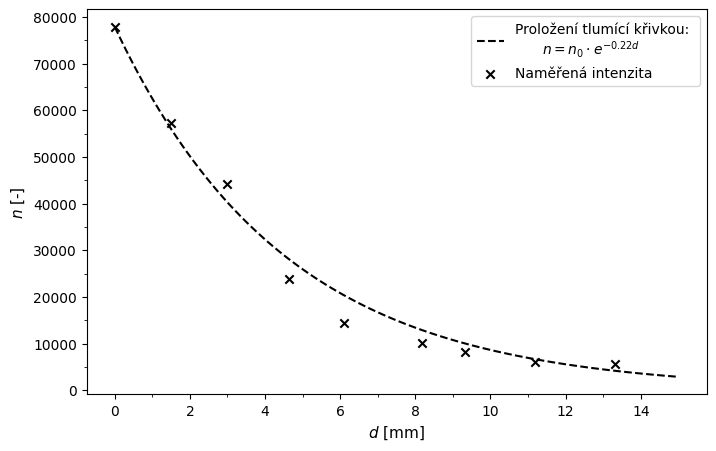

In [10]:
x_range = np.linspace(0,15,100)

plt.figure(figsize = (8,5))

plt.plot(x_range,damp(x_range,mu), color = 'k', linestyle = 'dashed', label = "Proložení tlumící křivkou: \n" + r"$\qquad n = n_0 \cdot e^{-0.22d}$")
plt.scatter(d,A2-background,color = 'k',marker='x',label = 'Naměřená intenzita')

plt.legend(loc='upper right', fontsize=10)

#handles, labels = plt.gca().get_legend_handles_labels()
#order = [1,0]
#plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order], loc='upper right', fontsize=11)

plt.xticks(np.arange(0,15,1), minor = True)
plt.yticks(np.arange(0,80000,5000), minor = True)

plt.ylabel("$n$ " + "[-]", fontsize=11)
plt.xlabel("$d$ [mm]", fontsize=11)

plt.savefig('damping.pdf', bbox_inches = 'tight')
plt.show()

In [11]:
tab = np.array([d,A2,A2-background]).round(2).T

print(tabulate(tab, tablefmt="latex_booktabs"))

\begin{tabular}{rrr}
\toprule
  0    & 79342 & 77892 \\
  1.5  & 58645 & 57195 \\
  2.98 & 45582 & 44132 \\
  4.65 & 25280 & 23830 \\
  6.11 & 15955 & 14505 \\
  8.18 & 11606 & 10156 \\
  9.33 &  9566 &  8116 \\
 11.18 &  7507 &  6057 \\
 13.32 &  7090 &  5640 \\
\bottomrule
\end{tabular}


# Uloha 3

In [63]:
ch, n = load('153/BG.txt')

In [64]:
def ch2E(x):
    return linear(x,3.5260245493470563,-45.90858821004207)

In [65]:
chE = ch2E(np.arange(1024))
chEs = ch2E(np.arange(1024)+0.5)

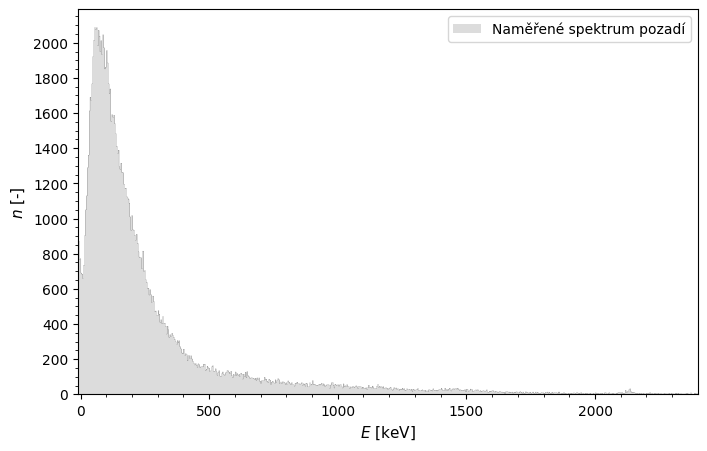

In [66]:
x_range = np.linspace(0,1024,100)

plt.figure(figsize = (8,5))


plt.bar(chE,n,width=w, facecolor = 'gainsboro', label = "Naměřené spektrum pozadí")
plt.step(chEs,n, color='k', linewidth = 0.1)
#plt.plot(x_range,func(x_range,a,b), color = 'k', linestyle = 'dashed', label = "Proložení kalibrační křivkou: \n" + r"$\qquad U = 3.9C + 2$")

plt.legend(loc='upper right',fontsize=10)

#handles, labels = plt.gca().get_legend_handles_labels()
#order = [1,0]
#plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order], loc='upper left', fontsize=11)

plt.xlim(-10,2400)
plt.ylim(0)

plt.xticks(np.arange(0,2400,100), minor = True)
plt.yticks(np.arange(0,2200,50), minor = True)
plt.yticks(np.arange(0,2200,200))

plt.ylabel("$n$ " + "[-]", fontsize=11)
plt.xlabel("$E$ [keV]", fontsize=11)

plt.savefig('BG.pdf', bbox_inches = 'tight')
plt.show()

# Uloha 4

In [67]:
def gauss(x,sig,mu,A,K):
    return A*np.exp(-(x-mu)**2/(2*sig**2))/(sig*np.sqrt(2*np.pi)) + K

In [68]:
def ch2E(x):
    return linear(x,3.5260245493470563,-45.90858821004207)

In [69]:
chE = ch2E(np.arange(1024))
chEs = ch2E(np.arange(1024)+0.5)

### $^{137}$Cs

In [36]:
ch1, n1 = load('153/Cs.txt')

In [37]:
low = 180
up = 230

params, err = curve_fit(gauss,ch1[low:up],(n1-n)[low:up],p0 = [9,201,14824,219])
sig1,mu1,A1,K1 = params
ssig1,smu1,sA1,sK1 = np.sqrt(np.diag(err))

print(sig1,mu1,A1,K1)
print(ssig1,smu1,sA1,sK1)

8.716718905282494 203.58678342382444 91135.29221996355 284.57995721720624
0.10029085708408336 0.05645662076955599 1454.7418796683985 30.18450853569298


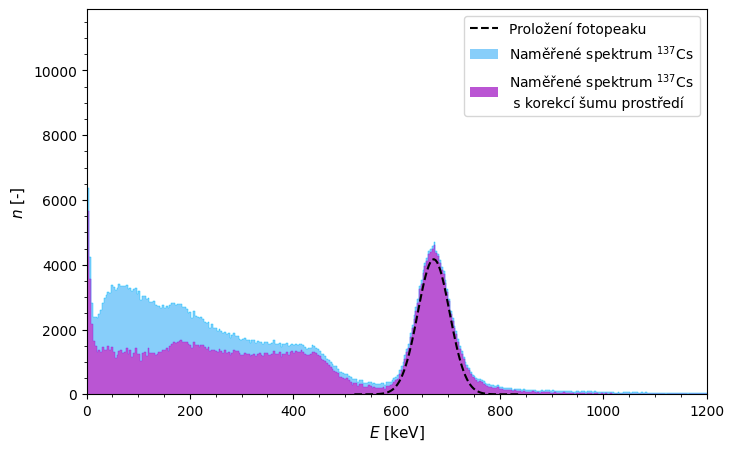

In [38]:
x_rangeE = ch2E(np.linspace(160,250,100))
x_range = np.linspace(160,250,100)

plt.figure(figsize = (8,5))


plt.bar(chE,n1,width=w, facecolor = 'lightskyblue', label = "Naměřené spektrum $^{137}$Cs")
plt.step(chEs,n1, color='deepskyblue', linewidth = 0.3)

plt.bar(chE,n1-n,width=w, facecolor = 'mediumorchid', label = "Naměřené spektrum $^{137}$Cs \n s korekcí šumu prostředí")
plt.step(chEs,n1-n, color='blueviolet', linewidth = 0.3)


plt.plot(x_rangeE,gauss(x_range,sig1,mu1,A1,K1)-K1, color = 'k', linestyle = 'dashed', label = "Proložení fotopeaku")

plt.legend(loc='upper right',fontsize=10)

#handles, labels = plt.gca().get_legend_handles_labels()
#order = [1,0]
#plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order], loc='upper left', fontsize=11)

plt.xlim(0,1200)
plt.ylim(0)

plt.xticks(np.arange(0,1200,50), minor = True)
plt.yticks(np.arange(0,12000,500), minor = True)

plt.ylabel("$n$ " + "[-]", fontsize=11)
plt.xlabel("$E$ [keV]", fontsize=11)

plt.savefig('Cs.pdf', bbox_inches = 'tight')
plt.show()

### $^{60}$Co

In [39]:
ch2, n2 = load('153/Co.txt')

In [40]:
low1 = 300
up1 = 390

params, err = curve_fit(gauss,ch2[low1:up1],(n2-n)[low1:up1],p0 = [10,350,150000,6000])
sig2_1,mu2_1,A2_1,K2_1 = params
ssig2_1,smu2_1,sA2_1,sK2_1 = np.sqrt(np.diag(err))

print(sig2_1,mu2_1,A2_1,K2_1)
print(ssig2_1,smu2_1,sA2_1,sK2_1)

8.077556383471869 345.1296116449443 138394.42313092193 8654.72867387622
0.4981484961580378 0.43617972169503366 8951.285829256269 143.9682187603245


In [41]:
low2 = 380
up2 = 410

params, err = curve_fit(gauss,ch2[low2:up2],(n2-n)[low2:up2],p0 = [9,390,150000,5000])
sig2_2,mu2_2,A2_2,K2_2 = params
ssig2_2,smu2_2,sA2_2,sK2_2 = np.sqrt(np.diag(err))

print(sig2_2,mu2_2,A2_2,K2_2)
print(ssig2_2,smu2_2,sA2_2,sK2_2)

13.432523008167452 390.4664321214071 303540.35587232694 2921.250391527113
0.5479672827265825 0.06786757310409787 28960.019562034442 511.11067060415195


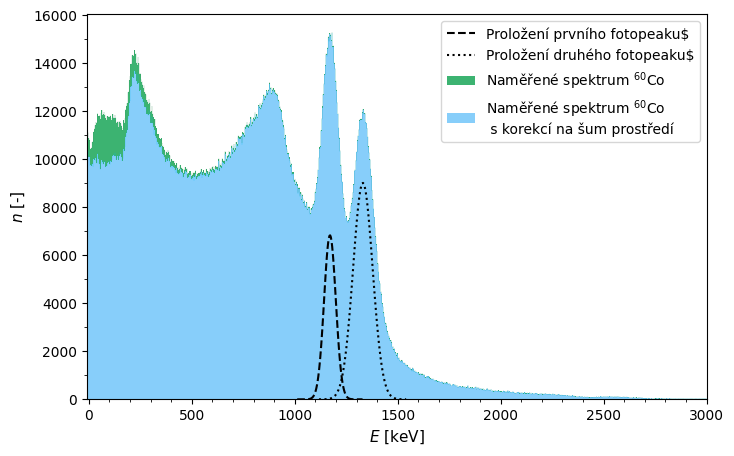

In [42]:
x_range = np.linspace(300,390,100)
x_range2 = np.linspace(330,450,100)
x_rangeE = ch2E(np.linspace(300,390,100))
x_range2E = ch2E(np.linspace(330,450,100))

plt.figure(figsize = (8,5))


plt.bar(chE,n2,width=w, facecolor = 'mediumseagreen', label = "Naměřené spektrum $^{60}$Co")
plt.step(chEs,n2, color='seagreen', linewidth = 0.1)

plt.bar(chE,n2-n,width=w, facecolor = 'lightskyblue', label = "Naměřené spektrum $^{60}$Co \n s korekcí na šum prostředí")
plt.step(chEs,n2-n, color='deepskyblue', linewidth = 0.1)

plt.plot(x_rangeE,gauss(x_range,sig2_1,mu2_1,A2_1,K2_1)-K2_1, color = 'k', linestyle = 'dashed', label = "Proložení prvního fotopeaku$")
plt.plot(x_range2E,gauss(x_range2,sig2_2,mu2_2,A2_2,K2_2)-K2_2, color = 'k', linestyle = 'dotted', label = "Proložení druhého fotopeaku$")

plt.legend(loc='upper right',fontsize=10)

#handles, labels = plt.gca().get_legend_handles_labels()
#order = [1,0]
#plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order], loc='upper left', fontsize=11)

plt.xlim(-10,3000)
plt.ylim(0)

plt.xticks(np.arange(0,3000,100), minor=True)
plt.yticks(np.arange(0,16000,1000), minor=True)

plt.ylabel("$n$ " + "[-]", fontsize=11)
plt.xlabel("$E$ [keV]", fontsize=11)

plt.savefig('Co.pdf', bbox_inches = 'tight')
plt.show()

### $^{241}$Am

In [43]:
ch3, n3 = load('153/Am.txt')

In [44]:
low1 = 12
up1 = 26

params, err = curve_fit(gauss,ch3[low1:up1],(n3-n)[low1:up1],p0 = [1,20,160000,5000])
sig3,mu3,A3,K3 = params
ssig3,smu3,sA3,sK3 = np.sqrt(np.diag(err))

print(sig3,mu3,A3,K3)
print(ssig3,smu3,sA3,sK3)

2.097348293953002 21.446963729897433 162129.00694364938 4994.8633470530895
0.13608977192772354 0.10532687966238188 12530.609492703623 980.1512898393363


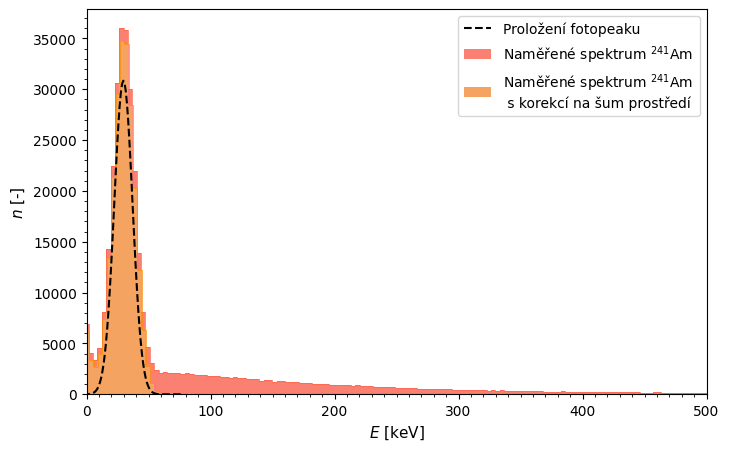

In [45]:
x_range = np.linspace(7,35,100)
x_rangeE = ch2E( np.linspace(7,35,100))

plt.figure(figsize = (8,5))

plt.bar(chE,n3,width=w, facecolor = 'salmon', label = "Naměřené spektrum $^{241}$Am")
plt.step(chEs,n3, color='tomato', linewidth = 0.5)

plt.bar(chE,n3-n,width = w, facecolor = 'sandybrown', label = "Naměřené spektrum $^{241}$Am \n s korekcí na šum prostředí")
plt.step(chEs+0.5,n3-n, color='darkorange', linewidth = 0.5)

plt.plot(x_rangeE,gauss(x_range,sig3,mu3,A3,K3)-K3, color = 'k', linestyle = 'dashed', label = "Proložení fotopeaku")

plt.legend(loc='upper right',fontsize=10)

#handles, labels = plt.gca().get_legend_handles_labels()
#order = [1,0]
#plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order], loc='upper left', fontsize=11)

plt.xticks(np.arange(0,500,10), minor=True)
plt.yticks(np.arange(0,38000,1000), minor=True)

plt.xlim(0,500)
plt.ylim(0)

plt.ylabel("$n$ " + "[-]", fontsize=11)
plt.xlabel("$E$ [keV]", fontsize=11)

plt.savefig('Am.pdf', bbox_inches = 'tight')
plt.show()

### $^{133}$Ba

In [46]:
ch4, n4 = load('153/Ba.txt')

In [47]:
low1 = 110
up1 = 125

params, err = curve_fit(gauss,ch4[low1:up1],(n4-n)[low1:up1],p0 = [7,115,460000,6000])
sig4,mu4,A4,K4 = params
ssig4,smu4,sA4,sK4 = np.sqrt(np.diag(err))

print(sig4,mu4,A4,K4)
print(ssig4,smu4,sA4,sK4)

7.2231692910714465 112.18091179768058 471755.5028788391 6300.146116417555
0.19609347130889096 0.07130357342790138 24510.082339849243 682.4521265257339


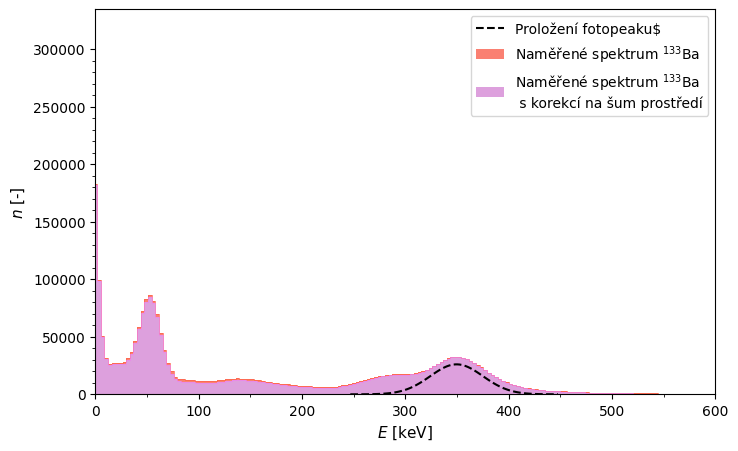

In [48]:
x_range = np.linspace(83,140,100)
x_rangeE = ch2E(np.linspace(83,140,100))

plt.figure(figsize = (8,5))

plt.bar(chE,n4,width=w, facecolor = 'salmon', label = "Naměřené spektrum $^{133}$Ba")
plt.step(chEs,n4, color='tomato', linewidth = 0.5)

plt.bar(chE,n4-n,width = w, facecolor = 'plum', label = "Naměřené spektrum $^{133}$Ba \n s korekcí na šum prostředí")
plt.step(chEs,n4-n, color='violet', linewidth = 0.5)

plt.plot(x_rangeE,gauss(x_range,sig4,mu4,A4,K4)-K4, color = 'k', linestyle = 'dashed', label = "Proložení fotopeaku$")

plt.legend(loc='upper right',fontsize=10)

#handles, labels = plt.gca().get_legend_handles_labels()
#order = [1,0]
#plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order], loc='upper left', fontsize=11)

plt.xticks(np.arange(0,600,50), minor=True)
plt.yticks(np.arange(0,300000,10000), minor=True)

plt.xlim(0,600)
plt.ylim(0)

plt.ylabel("$n$ " + "[-]", fontsize=11)
plt.xlabel("$E$ [keV]", fontsize=11)

plt.savefig('Ba.pdf', bbox_inches = 'tight')
plt.show()

### Neznamy

In [49]:
ch5, n5 = load('153/x.txt')

In [50]:
'''low = 180
up = 230

params, err = curve_fit(gauss,ch1[low:up],(n1-n)[low:up],p0 = [9,201,14824,219])
sig1,mu1,A1,K1 = params
ssig1,smu1,sA1,sK1 = np.sqrt(np.diag(err))

print(sig1,mu1,A1,K1)
print(ssig1,smu1,sA1,sK1)'''

'low = 180\nup = 230\n\nparams, err = curve_fit(gauss,ch1[low:up],(n1-n)[low:up],p0 = [9,201,14824,219])\nsig1,mu1,A1,K1 = params\nssig1,smu1,sA1,sK1 = np.sqrt(np.diag(err))\n\nprint(sig1,mu1,A1,K1)\nprint(ssig1,smu1,sA1,sK1)'

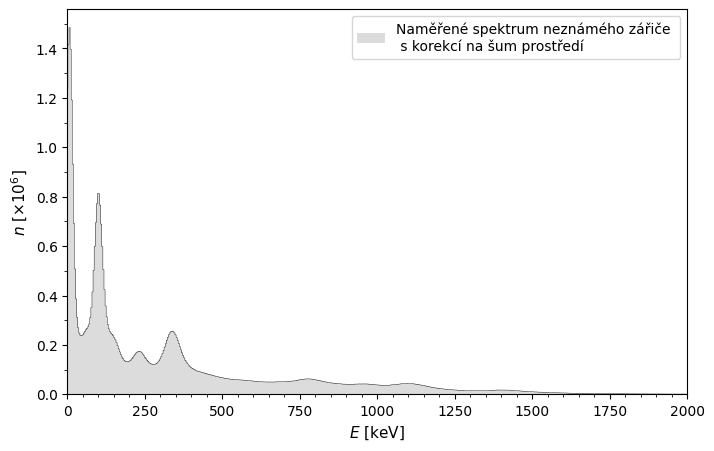

In [51]:
x_rangeE = ch2E(np.linspace(160,250,100))
x_range = np.linspace(160,250,100)

plt.figure(figsize = (8,5))

plt.bar(chE,(n5-n)/10**6,width=w, facecolor = 'gainsboro', label = "Naměřené spektrum neznámého zářiče \n s korekcí na šum prostředí")
plt.step(chEs,(n5-n)/10**6, color='k', linewidth = 0.3)


#plt.plot(x_rangeE,gauss(x_range,sig1,mu1,A1,K1)-K1, color = 'k', linestyle = 'dashed', label = "Proložení kalibrační křivkou: \n" + r"$\qquad U = 3.9C + 2$")

plt.legend(loc='upper right',fontsize=10)

#handles, labels = plt.gca().get_legend_handles_labels()
#order = [1,0]
#plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order], loc='upper left', fontsize=11)

plt.xlim(0,2000)
plt.ylim(0)

plt.xticks(np.arange(0, 2001, step=50), minor = True)
plt.yticks(np.arange(0, 1.6, step=.1), minor = True)

plt.ylabel("$n$ " + r"[$\times 10^6$]", fontsize=11)
plt.xlabel("$E$ [keV]", fontsize=11)

plt.savefig('Neznamy.pdf', bbox_inches = 'tight')
plt.show()

### Peaky, kalibrace

In [52]:
peaks = np.array([mu1,mu2_1,mu2_2,mu3,mu4])
speaks = np.array([smu1,smu2_1,smu2_2,smu3,smu4])

N = np.array([sig1,sig2_1,sig2_2,sig3,sig4])
sN = np.array([ssig1,ssig2_1,ssig2_2,ssig3,ssig4])

ch_cal = np.array([mu1,mu2_1,mu2_2,mu4])
sch_cal = np.array([smu1,smu2_1,smu2_2,smu4])
E_cal = np.array([662,1173,1332.5,356])
print(peaks)

[203.58678342 345.12961164 390.46643212  21.44696373 112.1809118 ]


In [53]:
params, err = curve_fit(linear, ch_cal,E_cal)
a,b = params
sa,sb = np.sqrt(np.diag(err))

print(a,b)
print(sa,sb)

3.5260245493470563 -45.90858821004207
0.03846178056701928 10.973588063212686


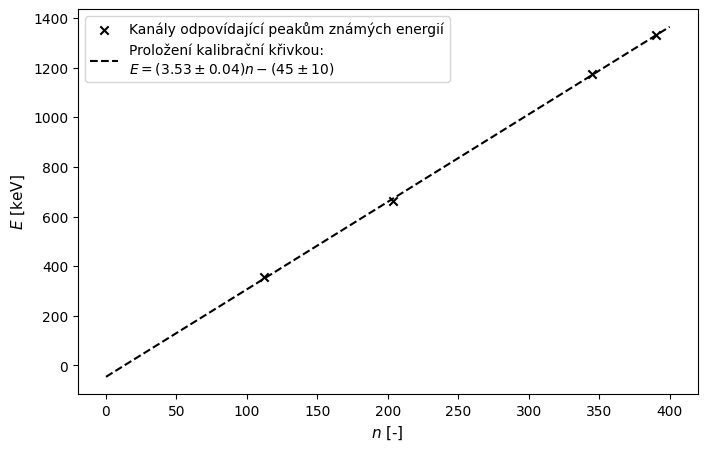

In [54]:
x_range = np.linspace(0,400,100)

plt.figure(figsize = (8,5))


plt.scatter(ch_cal,E_cal,color ='k', marker='x',label = "Kanály odpovídající peakům známých energií")

plt.plot(x_range,linear(x_range,a,b), color = 'k', linestyle = 'dashed', label = "Proložení kalibrační křivkou: \n" + r"$ E = (3.53 \pm 0.04)n - (45 \pm 10)$")

plt.legend(loc='upper left',fontsize=10)

#handles, labels = plt.gca().get_legend_handles_labels()
#order = [1,0]
#plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order], loc='upper left', fontsize=11)


plt.ylabel("$E$ " + "[keV]", fontsize=11)
plt.xlabel("$n$ [-]", fontsize=11)

plt.savefig('calibration.pdf', bbox_inches = 'tight')
plt.show()

In [55]:
def ch2E(x):
    return linear(x,3.5260245493470563,-45.90858821004207)

In [56]:
tab = np.array([E_cal,ch_cal,sch_cal]).round(1).T

print(tabulate(tab, tablefmt="latex_booktabs"))

\begin{tabular}{rrr}
\toprule
  662   & 203.6 & 0.1 \\
 1173   & 345.1 & 0.4 \\
 1332.5 & 390.5 & 0.1 \\
  356   & 112.2 & 0.1 \\
\bottomrule
\end{tabular}


# Uloha 5

In [57]:
FWHM = 3.5260245493470563 * 2.355 * np.array([sig1,sig2_1,sig2_2,sig3,sig4])
sFWHM = 3.5260245493470563 * 2.355 * np.array([ssig1,ssig2_1,ssig2_2,ssig3,ssig4])
E = ch2E(peaks)
sE = 3.5260245493470563 * speaks
FWHM

array([ 72.38178422,  67.07431426, 111.54082086,  17.4159352 ,
        59.97966514])

In [58]:
params, err = curve_fit(linear, E,FWHM, sigma=sFWHM, absolute_sigma=True)
a2,b2 = params
sa2,sb2 = np.sqrt(np.diag(err))

print(a2,b2)
print(sa2,sb2)

0.07360408343780475 21.202059184422172
0.0018882074548491835 1.0660846502787007


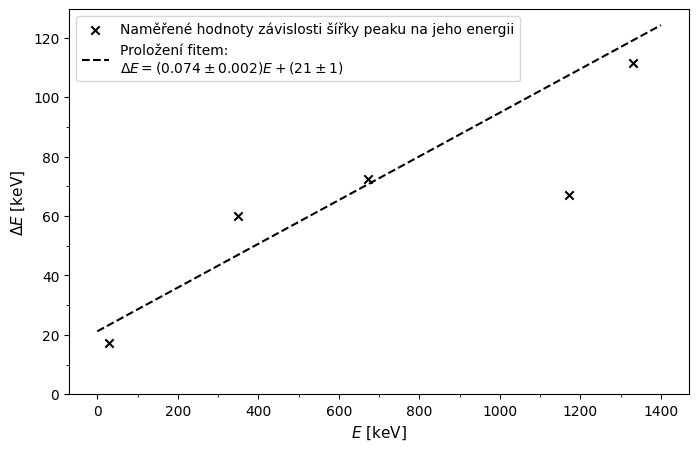

In [59]:
x_range = np.linspace(0,1400,100)

plt.figure(figsize = (8,5))


plt.scatter(E,FWHM,color ='k', marker='x',label = "Naměřené hodnoty závislosti šířky peaku na jeho energii")

plt.plot(x_range,linear(x_range,a2,b2), color = 'k', linestyle = 'dashed', label = "Proložení fitem: \n" + r"$ \Delta E = (0.074 \pm 0.002)E + (21 \pm 1)$")

plt.legend(loc='upper left',fontsize=10)

#handles, labels = plt.gca().get_legend_handles_labels()
#order = [1,0]
#plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order], loc='upper left', fontsize=11)

plt.xticks(np.arange(0,1400,100), minor=True)
plt.yticks(np.arange(0,100,10), minor=True)

plt.ylabel("$\Delta E$ " + "[keV]", fontsize=11)
plt.xlabel("$E$ [keV]", fontsize=11)

plt.savefig('resolution.pdf', bbox_inches = 'tight')
plt.show()

In [60]:
tab = np.array([E, sE,FWHM, sFWHM]).round(2).T

print(tabulate(tab, tablefmt="latex_booktabs"))

\begin{tabular}{rrrr}
\toprule
  671.94 & 0.2  &  72.38 & 0.83 \\
 1171.03 & 1.54 &  67.07 & 4.14 \\
 1330.89 & 0.24 & 111.54 & 4.55 \\
   29.71 & 0.37 &  17.42 & 1.13 \\
  349.64 & 0.25 &  59.98 & 1.63 \\
\bottomrule
\end{tabular}
